1. Підготувати датасет з двома класами зображень на вибір
(завантажити будь-які картинки двох класів). Наприклад:
зображення котів та собак АБО комаха та квітка АБО літак та
кінь і тд. Для завантаження багатьох зображень рекомендовано
встановити розширення Download all images в google chrome,
посилання на розширення:
https://chromewebstore.google.com/detail/download-all-
images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en-
GB&utm_source=ext_sidebar
2. Завантажити зображення двох класів (відповідно кожен клас в
окремій папці) на google drive.
3. Підключити google drive до вашого google colab notebook.

['class-0', 'class-1']
[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 27  27  33]
  [ 27  27  33]
  [ 27  27  33]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 26  26  32]
  [ 27  27  33]
  [ 27  27  33]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 26  26  32]
  [ 26  26  32]
  [ 26  26  32]]

 ...

 [[  9   7 107]
  [ 15  14 112]
  [ 15  11 106]
  ...
  [ 12   0   0]
  [  8   3   2]
  [  2   0   0]]

 [[  3   2 100]
  [ 11  10 106]
  [ 16  12 107]
  ...
  [  7   0   0]
  [  6   4   3]
  [  0   0   0]]

 [[  0   0  93]
  [  6   5 101]
  [ 17  13 108]
  ...
  [  4   1   0]
  [  4   5   3]
  [  0   5   4]]]
(300, 168, 3)


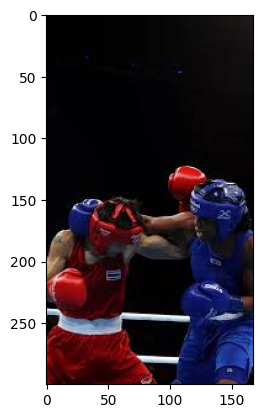

In [23]:
#task_1_4
import numpy as np
np.set_printoptions(linewidth=np.inf)
import cv2
import imghdr
from matplotlib import pyplot as plt
data_location = './drive/MyDrive/L3'
import os
print(os.listdir(data_location))
img = cv2.imread(os.path.join(data_location, 'class-1/image.jpeg'))
print(img)
print(img.shape)
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [97]:
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


4. Зчитати дані будь-якої картинки та відобразити її в google colab
notebook.
5. Перевірити розширення картинок, видалити усі окрім 'jpeg', 'jpg',
'bmp', 'png'.

In [24]:
#task_5
image_extentions = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(data_location):
  for image in os.listdir(os.path.join(data_location, image_class)):
    image_path = os.path.join(data_location, image_class, image)
    try:
      image_extention = imghdr.what(image_path)
      if image_extention not in image_extentions:
        print(f'Image not in ext list {image_path}')
        os.remove(image_path)
    except Exception as e:
      print(f'Issue with image {image_path}')

Image not in ext list ./drive/MyDrive/L3/class-0/b1a7ebd10a63571b20e71ef58a97825776afd653-6192x4128.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/2024051865565432img8717_2.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/7-steps-better-cyclist-07.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/9651d67f11e20bff188002206b4b6acf.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/1200x628_FACEBOOK_Best_Hip_Rotator_Stretches_for_Cyclists-1200x628.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/1200px-20220424_Liege_Bastogne_Liege117_edited_by_PetarM.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/7-reasons-why-every-cyclist-should-get-cycling-insurance-WEB.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/_Hannah_Kemp_RideLondon_special_olympics_athlete_s0uaxd0b.jpeg
Image not in ext list ./drive/MyDrive/L3/class-0/GettyImages-1480580025.jpg
Image not in ext list ./drive/MyDrive/L3/class-0/GettyImages-1467330232.jpg
Image not in ext list ./drive/MyDrive/L3/cla

6. Створити датасет з картинок за допомогою
tf.keras.utils.image_dataset_from_directory.
7. Створити numpy_iterator з датасету (використати
as_numpy_iterator метод).
8. Нормалізувати дані.

In [26]:
#task_6
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

data_location = './drive/MyDrive/L3'
data = tf.keras.utils.image_dataset_from_directory(data_location)



#task_7
data_iterator = data.as_numpy_iterator()
import numpy as np

print(f'data length: {len(data)}')

data = data.map(lambda x,y: (x/255, y))

data_scaled_iterator = data.as_numpy_iterator()




Found 277 files belonging to 2 classes.
data length: 9


Batch scaled max: 1.0
Batch scaled min: 0.0


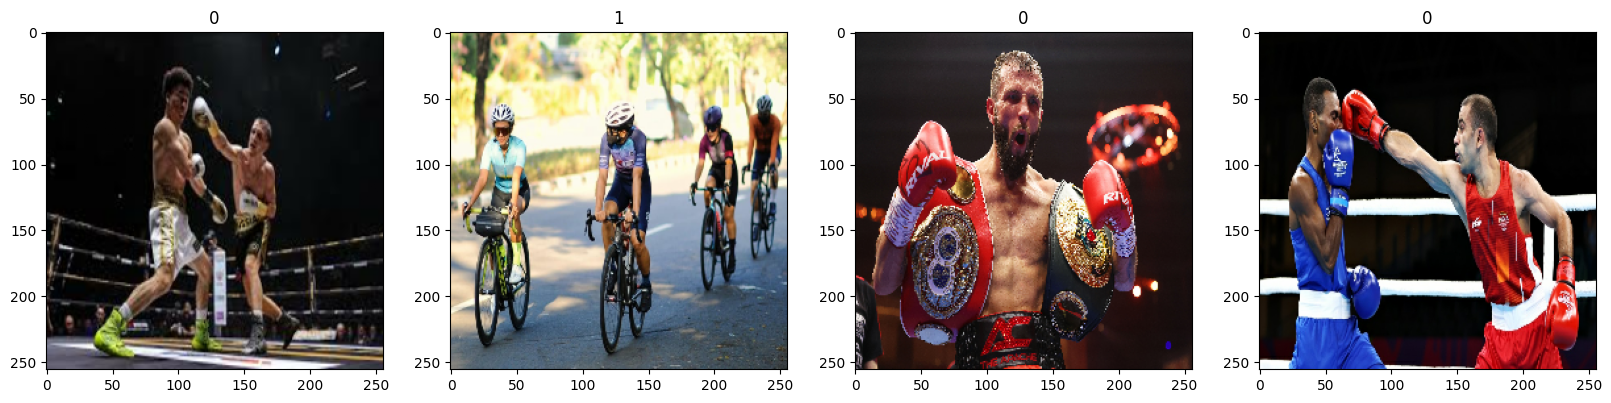

In [4]:

tuple_data_index = 0
tuple_label_index = 1
scaled_batch = data_scaled_iterator.next()

print(f'Batch scaled max: {scaled_batch[tuple_data_index].max()}')
print(f'Batch scaled min: {scaled_batch[tuple_data_index].min()}')

column_count = 4
fig, ax = plt.subplots(ncols=column_count, figsize=(20,20))
for idx, img in enumerate(scaled_batch[tuple_data_index][:column_count]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[tuple_label_index][idx])


In [27]:
print(f'data length: {len(data)}')


data length: 9


9. Розділити дані на тренувальні, валідаційні та тестувальні.
10. Реалізувати згорткову нейронну мережу (CNN) використовуючи
шари Conv2D, MaxPooling2D, Flatten, Dense.

In [36]:
#task_9
train_size = round(len(data)*.7)
val_size = round(len(data)*.2)
test_size = round(len(data)*.1)

print(f'train_size: {train_size}')
print(f'val_size: {val_size}')
print(f'test_size: {test_size}')

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
print(len(train))
print(len(val))
print(len(test))

#task_10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

model.add(Conv2D(18,(3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(18, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['acuracy'])




train_size: 6
val_size: 2
test_size: 1
6
2
1
Epoch 1/20


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


11. Натренувати нейронну мережу та протестувати, відобразити
результати тестування

In [33]:
import tensorflow as tf

log_location = './drive/MyDrive/L3'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_location)



hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 256, 256, 3)
